In [2]:
from matplotlib import pyplot as plt
import numpy as np
import skimage, skimage.morphology, skimage.feature, skimage.filters
%matplotlib inline

In [3]:
pic = plt.imread("pics2/3.JPG")
# pic = resize(pic, pic.shape/4, anti_aliasing=True)
hsvpic = skimage.color.rgb2hsv(pic)
bwpic = hsvpic[:,:,2]

# despeckling
# bwpic = skimage.filters.median((bwpic * 2**16).astype("uint16"), skimage.morphology.disk(8))
bwpic = bwpic/np.max(bwpic)

In [3]:
bwpic[0]

array([0.16410256, 0.11794872, 0.11282051, ..., 0.06153846, 0.06666667,
       0.06666667])

**TODO:** Threshold should be determined automatically.

**IDEA:** Find the maximum of the density above its mean, and then recess by a certain $\sigma$-value.

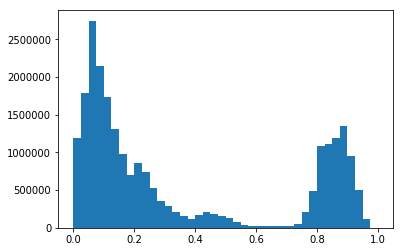

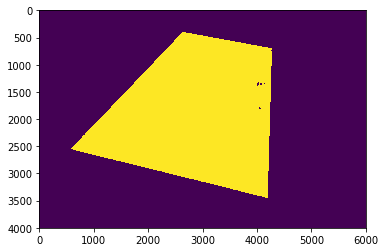

In [4]:
plt.figure("hist")
density, edges, _ = plt.hist(bwpic.flat, bins = 40)
mean = np.mean(bwpic)
sigma = np.std(bwpic)
stepback = 0.5
split = np.searchsorted(edges, mean, side='right')
maxd = split + np.argmax(density[split:])
threshold = edges[maxd] - stepback*sigma
maskpic = bwpic > threshold
plt.figure("mask")
disk = skimage.morphology.disk(10)
maskpic = skimage.morphology.binary_opening(maskpic, selem=disk)
maskpic = skimage.morphology.closing(maskpic, selem=disk)
plt.imshow(skimage.morphology.opening(maskpic))

The idea is to isolate the table region, so since the thresholding is by value, Canny is used to detect consistent changes in hue.

The shown images are dilated/eroded to make the edges/region isolation more evident.

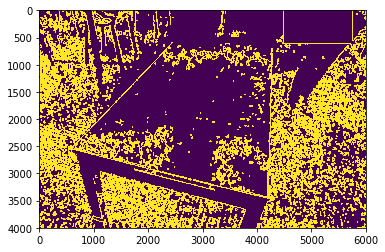

In [5]:
huepic = hsvpic[:,:,0]
cannyhue = skimage.feature.canny(huepic, sigma=5)
plt.figure("cannyhue")
plt.imshow(skimage.morphology.dilation(cannyhue, selem=disk))

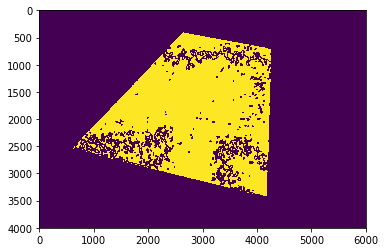

In [6]:
huemask = ~cannyhue & maskpic
plt.figure("huemask")
plt.imshow(skimage.morphology.erosion(huemask, selem=disk))

In [7]:
bwpic.flat[0]

0.1641025641025641

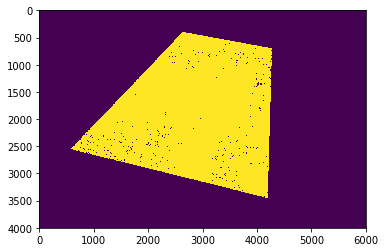

In [8]:
labeledpic = skimage.measure.label(huemask)
largestmask = labeledpic == np.argmax(np.bincount(labeledpic.flat)[1:])+1
plt.figure("largestmask")
plt.imshow(largestmask)

In [9]:
np.argmin([1, 1, 1, 0, 1, 1])

3